In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import stochtrans1D

In [2]:
deterministic_model = stochtrans1D.StochSaddleNode(0)
xinit = [-1.0,-0.5,0,0.5,-2.0,-5.0]

In [3]:
stoch_model_00 = stochtrans1D.StochSaddleNode(10.0)
stoch_model_0 = stochtrans1D.StochSaddleNode(1.0)
stoch_model_1 = stochtrans1D.StochSaddleNode(0.1)
stoch_model_2 = stochtrans1D.StochSaddleNode(0.01)

# The deterministic system

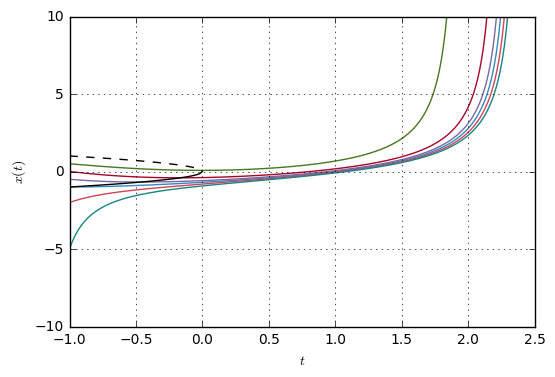

In [3]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(x0,-1.0,T=4,dt=0.01) for x0 in xinit])

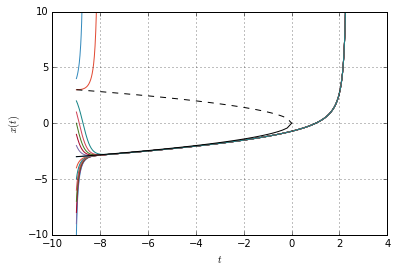

In [13]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(x0,-9.0,T=12,dt=0.01) for x0 in xrange(-10,5)])

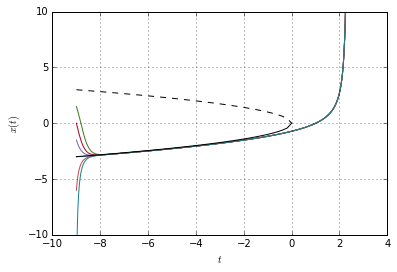

In [14]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

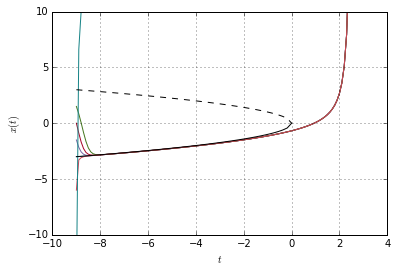

In [15]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(3*x0,-9.0,T=12,dt=0.1) for x0 in xinit])

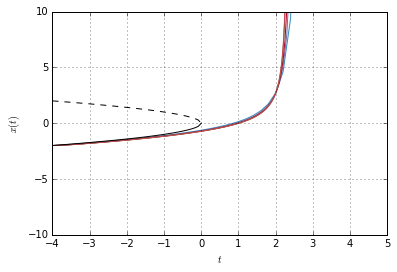

In [16]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(-2.0,-4.0,T=12,dt=deltat) for deltat in [0.2,0.1,0.05,0.01,0.005]])

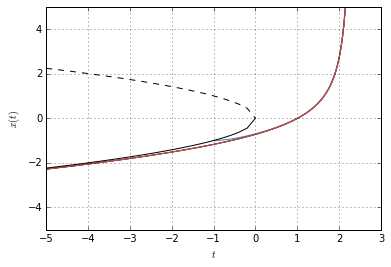

In [18]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(-np.sqrt(np.abs(t0)),t0,T=np.abs(t0)+4,dt=0.01) for t0 in [-1.0,-9.0,-100.0,-400.0,-900.0]],ylim=(-5,5),xlim=(-5,3))

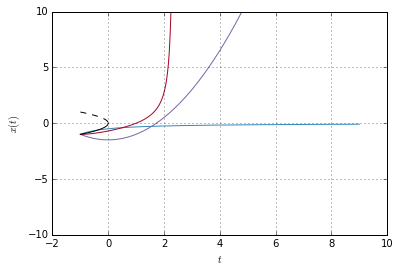

In [120]:
deterministic_model.trajectoryplot(stochtrans1D.StochModel(lambda x,t: x**2,0).trajectory(-1.0,-1.0,T=10,dt=0.01),stochtrans1D.StochModel(lambda x,t: t,0).trajectory(-1.0,-1.0,T=10,dt=0.01),deterministic_model.trajectory(-1.0,-1.0,T=10,dt=0.01))

## What happens in $-\infty$

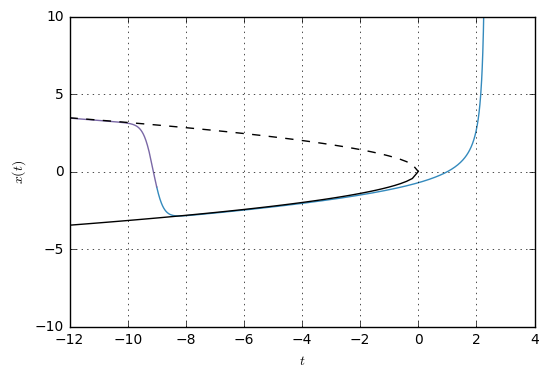

In [4]:
deterministic_model.trajectoryplot(deterministic_model.trajectory(-1.0,-9.0,T=12,dt=0.01),deterministic_model.trajectory(-1.0,-9.0,T=3,dt=-0.01))

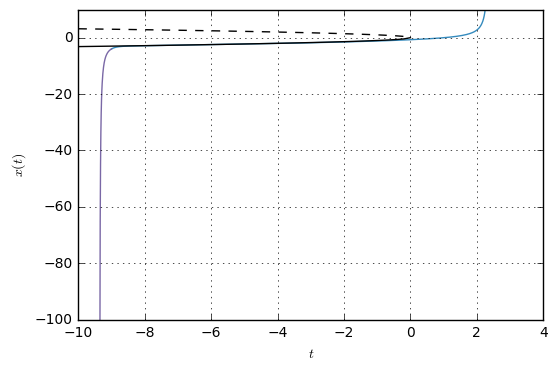

In [38]:
deterministic_model.trajectoryplot(deterministic_model.trajectory(-4.0,-9.0,T=12,dt=0.01),deterministic_model.trajectory(-4.0,-9.0,T=3,dt=-0.01),ylim=(-100,10))

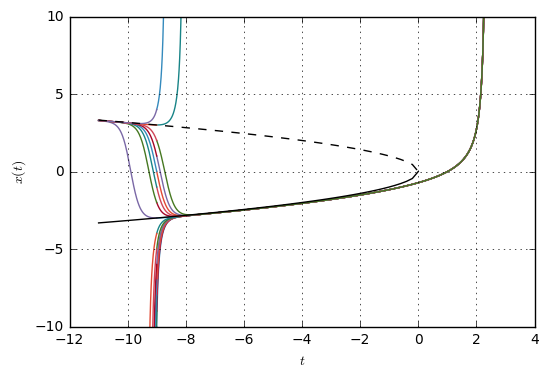

In [32]:
deterministic_model.trajectoryplot(*sum([[deterministic_model.trajectory(x0,-9.0,T=12,dt=0.01),deterministic_model.trajectory(x0,-9.0,T=2,dt=-0.01)] for x0 in xrange(-10,5)],[]))

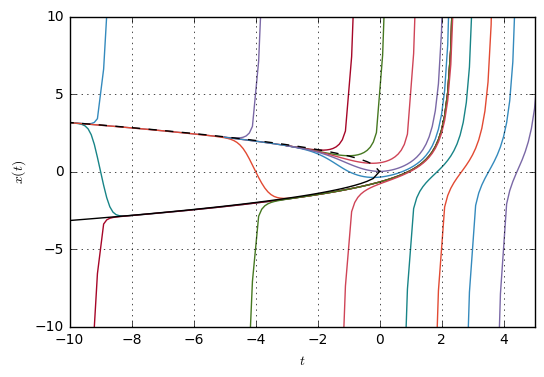

In [85]:
def forbacktraj(x0,t0):
    tfor,xfor = deterministic_model.trajectory(x0,t0,T=abs(t0)+3,dt=0.1)
    tback,xback = deterministic_model.trajectory(x0,t0,T=abs(t0)+3,dt=-0.1)
    return (np.concatenate((tback[:0:-1],tfor)),np.concatenate((xback[:0:-1],xfor)))
deterministic_model.trajectoryplot(
    forbacktraj(5.0,-9.0),forbacktraj(5.0,-4.0),forbacktraj(5.0,-1.0),forbacktraj(5.0,0.0),forbacktraj(5.0,1.0),    
    forbacktraj(0.0,-9.0),forbacktraj(0.0,-4.0),forbacktraj(0.0,-1.0),forbacktraj(0.0,0.0),
    forbacktraj(-5.0,-9.0),forbacktraj(-5.0,-4.0),forbacktraj(-5.0,-1.0),forbacktraj(-5.0,1.0),forbacktraj(-5.0,2.0),forbacktraj(-5.0,3.0),forbacktraj(-5.0,4.0),
    xlim=(-10,5))

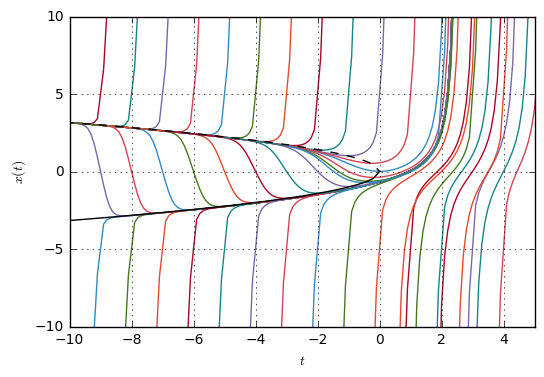

In [86]:
deterministic_model.trajectoryplot(*[forbacktraj(x0,t0) for t0 in xrange(-9,5) for x0 in [-5.0,0.0,5.0]], xlim=(-10,5))

## Blowup time in the deterministic model

In [5]:
deterministic_model.blowuptime(-10.0,-100.0,T=103,dt=0.0001)

2.3395

In [6]:
deterministic_model.blowuptime(-3.0,-9.0,T=13,dt=0.0001)

2.3395

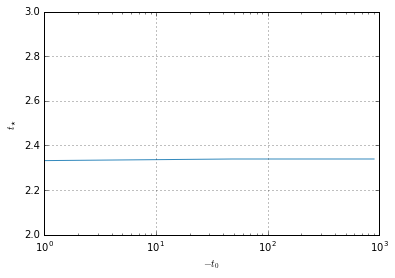

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set_xlabel('$-t_0$')
ax.set_ylabel('$t_\star$')
ax.set_xscale('log')
ax.set_ylim((2,3))
initcond = np.linspace(-900,-1,num=20)
ax.plot(-initcond,[deterministic_model.blowuptime(-np.sqrt(np.abs(t0)),t0,T=np.abs(t0)+4,dt=0.0001) for t0 in initcond])
plt.show()

In [11]:
t,x=deterministic_model.trajectory(-10.0,-100.0,T=103,dt=0.0001,finite=True)

In [12]:
(x*(tstar-t))[-10:]

array([  3.95257425e+00,   5.05550766e+00,   7.22028399e+00,
         1.25695591e+01,   3.24284554e+01,   1.94258011e+02,
         7.21718311e+03,   1.15871460e+07,   3.35199213e+13,
         0.00000000e+00], dtype=float32)

In [13]:
x[-10:]

array([  4.39160205e+03,   6.32021924e+03,   1.03147363e+04,
         2.09541152e+04,   6.48616094e+04,   4.85564438e+05,
         2.40628460e+07,   5.79261153e+10,   3.35543530e+17,
         1.12589462e+31], dtype=float32)

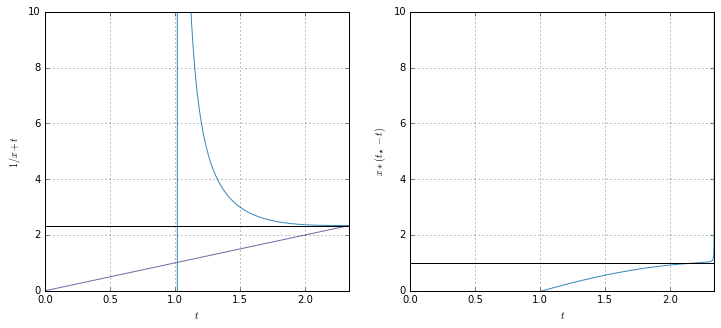

In [323]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$t$')
    ax.set_xlim([0,tstar])
    ax.set_ylim([0,10])
    ax.grid()
ax1.set_ylabel('$1/x+t$')
ax2.set_ylabel('$x*(t_\star-t)$')
ax1.plot(t,1/x+t)
ax1.plot(t,t)
ax1.axhline(y=tstar,color='black')
ax2.plot(t,x*(tstar-t))
ax2.axhline(y=1,color='black')
plt.show()

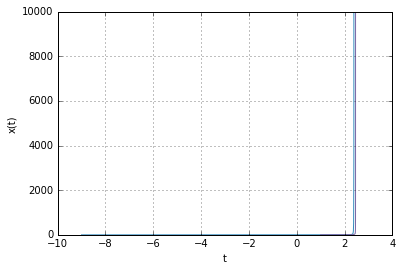

In [207]:
t0,x0 = (-9.0,-3.0)
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_ylim([0,10000])
ax.grid()
ax.plot(*deterministic_model.trajectory(x0,t0,T=13,dt=0.01))
#ax.plot(*stochtrans1D.StochModel(lambda x,t: x**2,0).trajectory(x0,t0,T=13,dt=0.01))
t = np.linspace(1.0,3.0,num=10000)
x = 1/(tstar-t)
ax.plot(t[x>0],x[x>0])
plt.show()

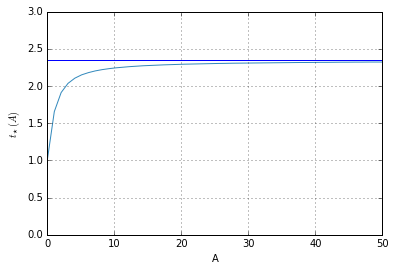

In [19]:
fig = plt.figure()
ax  = plt.axes() 
ax.set_xlabel('A')
ax.set_ylabel('$t_\star(A)$')
ax.set_ylim([0,3])
ax.grid()
ax.plot(*zip(*[(A,deterministic_model.escapetime_sample(-3.0,-9.0,A,ntraj=1,dt=0.001)) for A in np.linspace(0,50)]))
ax.axhline(y=deterministic_model.blowuptime(-3.0,-9.0,T=13,dt=0.001))
#ax.plot(np.linspace(0.1,20),2.7-1.0/np.linspace(0.1,20))
plt.show()

In [99]:
time = [deterministic_model.escapetime_sample(-3.0,-9.0,A,ntraj=1) for A in np.linspace(0,20)]

In [118]:
deterministic_model.escapetime_sample(-3.0,-9.0,1000000000,ntraj=1,dt=0.01)

array([ 2.43010879], dtype=float32)

In [102]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(lambda t,x: x+1./t,np.linspace(0,20),time)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

# The stochastic system

## Example trajectories

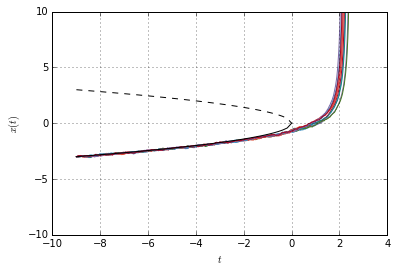

In [4]:
stoch_model_2.trajectoryplot(*[stoch_model_2.trajectory(-3.0,-9.0,T=12,dt=0.01) for k in xrange(0,10)])

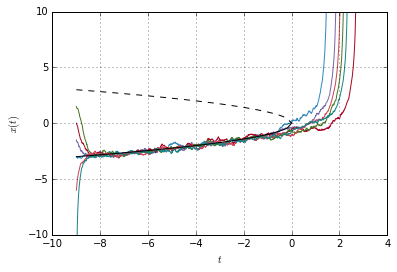

In [18]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

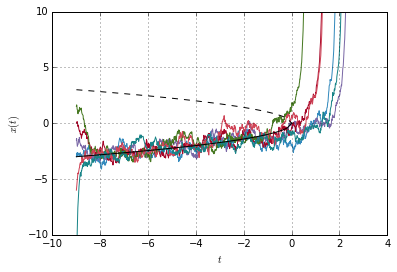

In [34]:
stoch_model_0.trajectoryplot(*[stoch_model_0.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

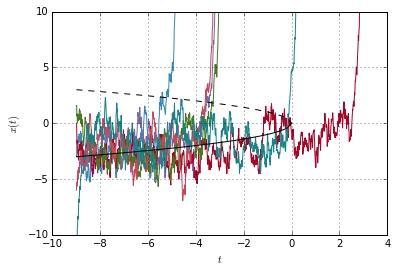

In [36]:
stoch_model_00.trajectoryplot(*[stoch_model_00.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

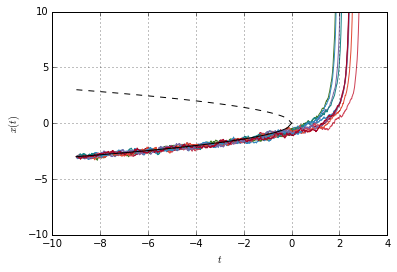

In [19]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(-3.0,-9.0,T=12,dt=0.01) for k in xrange(0,10)])

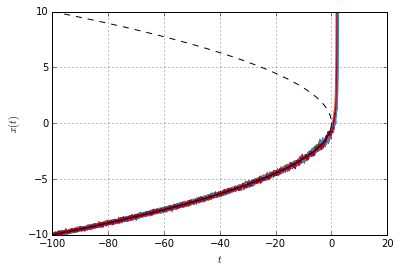

In [41]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(-10.0,-100.0,T=105,dt=0.01) for k in xrange(0,10)])

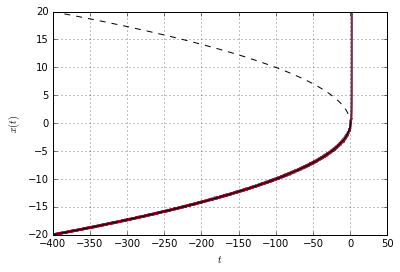

In [30]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(-20.0,-400.0,T=405,dt=0.01) for k in xrange(0,10)],ylim=(-20,20))

## Testing numerical convergence of the statistics

In [268]:
def myaccumean(array):
    return reduce(lambda l,a: l+[l[-1]+a],array,[0])[1:]/np.arange(1,len(array)+1)
def accumean(array):
    return np.cumsum(array)/np.arange(1,len(array)+1)
samples = stoch_model_1.escapetime_sample(-3,-9,10,ntraj=100000)
from timeit import default_timer as timer
start = timer()
avg1 = myaccumean(samples)
time1 = timer() - start
start = timer()
avg2 = accumean(samples)
time2 = timer() - start
print "Home-made method: %f s; Numpy method: %f s; Agreement: %s" % (time1,time2,np.allclose(avg1,avg2))

Home-made method: 15.407758 s; Numpy method: 0.001017 s; Agreement: True


In [281]:
def accumean(array):
    return np.cumsum(array)/np.arange(1,len(array)+1)

def accustd(array):
    return np.sqrt(np.abs(accumean(array**2)-accumean(array)**2))

In [290]:
def escapetime_test_cvg(accufun,fun,label,x0,t0,A,*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$n_{iter}$')
    ax.set_ylabel(label)
    ax.set_xscale('log')
    plt.grid()
    maxtraj = kwargs.get('maxtraj',10000)
    for model in args:
        samples = model.escapetime_sample(x0,t0,A,ntraj=maxtraj,**kwargs)
        line, = ax.plot(np.arange(1,len(samples)+1),accufun(samples),linewidth=2,label='$\epsilon=$'+str(model.D0))
        ax.axhline(y=fun(samples),linewidth=1,color=line.get_color(),linestyle='dashed')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

def escapetime_avg_cvg(x0,t0,A,*args,**kwargs):
    escapetime_test_cvg(accumean,np.mean,'$<t_\star>$',x0,t0,A,*args,**kwargs)
    
def escapetime_std_cvg(x0,t0,A,*args,**kwargs):
    escapetime_test_cvg(accustd,np.std,'$\sigma$',x0,t0,A,*args,**kwargs)

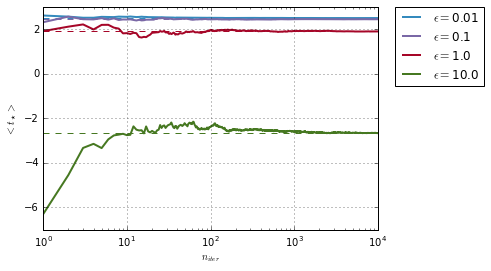

In [291]:
escapetime_avg_cvg(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,maxtraj=10000)

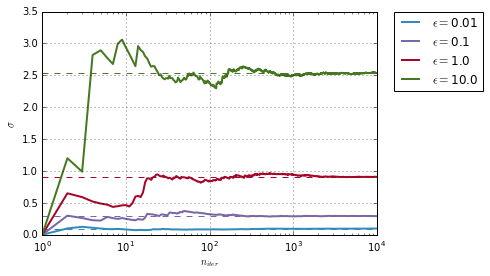

In [292]:
escapetime_std_cvg(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,maxtraj=10000)

## Statistics as a function of the parameters

Let us first compute some samples for an initial condition far back in time. Since these are pretty expensive to compute, we store them in memory for future use. Computations with later initial conditions are not so expensive.

In [46]:
epsvals = np.array([x*10.0**n for n in xrange(1,4) for x in xrange(1,10)])
samples = np.array([stochtrans1D.StochSaddleNode(eps).escapetime_sample(-30,-900,20) for eps in epsvals])
avgt = np.mean(samples,axis=1)
stdt = np.std(samples,axis=1)

In [64]:
samples.nbytes

10800000

### Mean first passage time (*escape time*)

In [66]:
def escapetime_avg(x0,t0,*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$\epsilon$')
    ax.set_ylabel('$<t_\star>$')
    ax.set_xscale('log')
    ax.set_yscale(kwargs.get('yscale','linear'))
    ax.grid()
    if ax.get_yscale() == 'linear':
        ax.axhline(y=t0,linewidth=1,color='black')
    epsvals = np.array([x*10.0**n for n in kwargs.get('eps_exp_range',xrange(-2,3)) for x in xrange(1,10)])
    for A in args:
        avgt = np.array([np.mean(stochtrans1D.StochSaddleNode(eps).escapetime_sample(x0,t0,A,**kwargs)) for eps in epsvals])
        if ax.get_yscale() == 'log':
            line, = ax.plot(epsvals[avgt < 0],-avgt[avgt < 0],linewidth=2,label='A='+str(A))
        else:
            line, = ax.plot(epsvals,avgt,linewidth=2,label='A='+str(A))
            ax.axhline(y=deterministic_model.escapetime_sample(x0,t0,A,ntraj=1),linewidth=1,color=line.get_color(),linestyle='dashdot')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

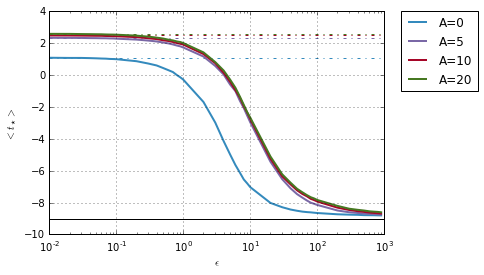

In [8]:
escapetime_avg(-3,-9,0,5,10,20,ntraj=10000)

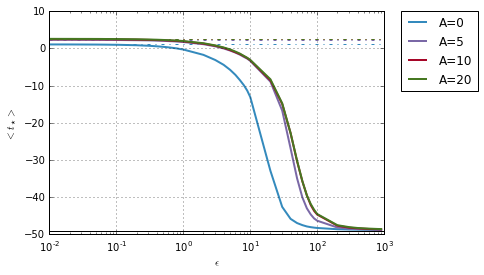

In [10]:
escapetime_avg(-7,-49,0,5,10,20,ntraj=10000)

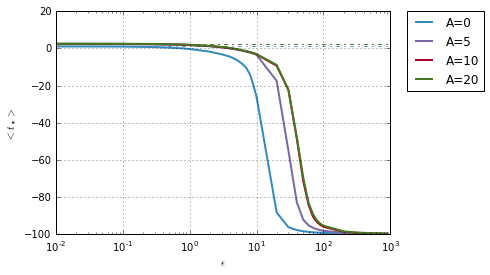

In [21]:
escapetime_avg(-10,-100,0,5,10,20,ntraj=10000)

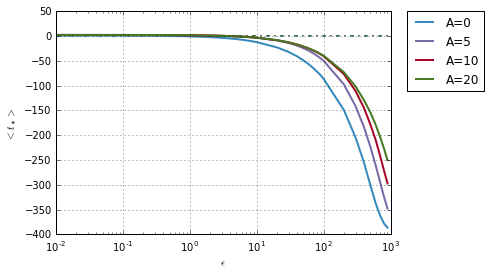

In [10]:
escapetime_avg(-20,-400,0,5,10,20,ntraj=10000)

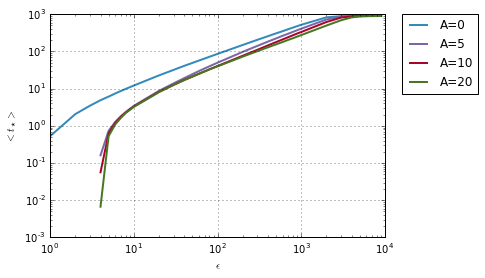

In [69]:
escapetime_avg(-30,-900,0,5,10,20,ntraj=10000,yscale='log',eps_exp_range=range(0,4))

In [45]:
def escapetime_avg_finitesizeeffects(*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$\epsilon$')
    ax.set_ylabel('$<t_\star>$')
    ax.set_yscale(kwargs.get('yscale','linear'))
    ax.set_xscale('log')
    ax.grid()
    epsvals = np.array([x*10.0**n for n in kwargs.get('eps_exp_range',xrange(-2,3)) for x in xrange(1,10)])
    for t0 in args: 
        x0 = -np.sqrt(np.abs(t0))
        A  = kwargs.get('A',20)
        avgt = np.array([np.mean(stochtrans1D.StochSaddleNode(eps).escapetime_sample(x0,t0,A,**kwargs)) for eps in epsvals])
        if ax.get_yscale() == 'log':
            line, = ax.plot(epsvals[avgt < 0],-avgt[avgt < 0],linewidth=2,label='t0='+str(t0))
        else:    
            line, = ax.plot(epsvals,avgt,linewidth=2,label='t0='+str(t0))
            ax.axhline(y=deterministic_model.escapetime_sample(x0,t0,A,ntraj=1),linewidth=1,color=line.get_color(),linestyle='dashdot')
            ax.axhline(y=t0,linewidth=1,color=line.get_color(),linestyle='dashed')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

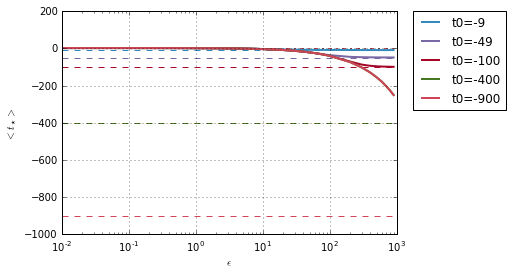

In [17]:
escapetime_avg_finitesizeeffects(-9,-49,-100,-400,-900,ntraj=10000)

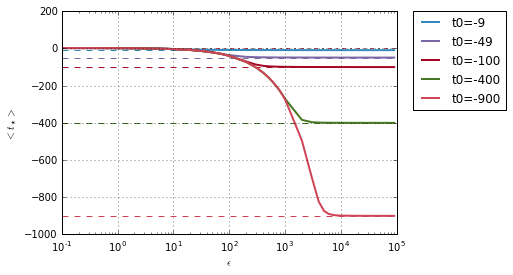

In [20]:
escapetime_avg_finitesizeeffects(-9,-49,-100,-400,-900,ntraj=10000,eps_exp_range=range(-1,5))

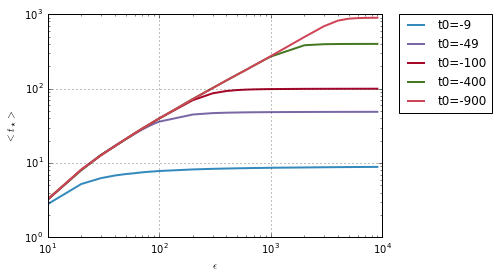

In [50]:
escapetime_avg_finitesizeeffects(-9,-49,-100,-400,-900,ntraj=10000,eps_exp_range=range(1,4),yscale='log')

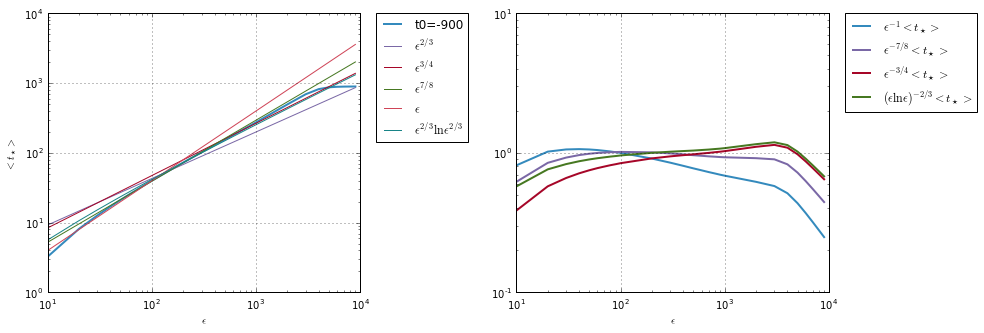

In [82]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$\epsilon$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid()
ax1.set_ylabel('$<t_\star>$')
t0, x0, A = (-900,-30, 20)
ax1.plot(epsvals[avgt < 0],-avgt[avgt < 0],linewidth=2,label='t0='+str(t0))
ax1.plot(epsvals,2*epsvals**(2./3),label='$\epsilon^{2/3}$')
ax1.plot(epsvals,1.5*epsvals**(3./4),label='$\epsilon^{3/4}$')
ax1.plot(epsvals,0.7*epsvals**(7./8),label='$\epsilon^{7/8}$')
ax1.plot(epsvals,0.4*epsvals,label='$\epsilon$')
ax1.plot(epsvals,0.7*(epsvals*np.log(epsvals))**(2./3),label='$\epsilon^{2/3}\ln \epsilon ^{2/3}$')
ax1.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
ax2.plot(epsvals[avgt < 0],-avgt[avgt < 0]/(0.4*epsvals[avgt < 0]),linewidth=2,label='$\epsilon^{-1}<t_\star>$')
ax2.plot(epsvals[avgt < 0],-avgt[avgt < 0]/(0.7*epsvals[avgt < 0]**(7./8)),linewidth=2,label='$\epsilon^{-7/8}<t_\star>$')
ax2.plot(epsvals[avgt < 0],-avgt[avgt < 0]/(1.5*epsvals[avgt < 0]**(3./4)),linewidth=2,label='$\epsilon^{-3/4}<t_\star>$')
ax2.plot(epsvals[avgt < 0],-avgt[avgt < 0]/(0.7*(epsvals[avgt < 0]*np.log(epsvals[avgt < 0]))**(2./3)),linewidth=2,label='$(\epsilon\ln\epsilon)^{-2/3}<t_\star>$')
ax2.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
fig.subplots_adjust(wspace=0.5)
plt.show()

### Standard deviation of the escape time

In [48]:
def escapetime_std(x0,t0,*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$\epsilon$')
    ax.set_ylabel('$\sigma$')
    ax.set_xscale('log')
    ax.set_yscale(kwargs.get('yscale','linear'))
    ax.grid()
    epsvals = np.array([x*10.0**n for n in kwargs.get('eps_exp_range',xrange(-2,3)) for x in xrange(1,10)])
    for A in args:
        line, = ax.plot(epsvals,[np.std(stochtrans1D.StochSaddleNode(eps).escapetime_sample(x0,t0,A,**kwargs)) for eps in epsvals],linewidth=2,label='A='+str(A))
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

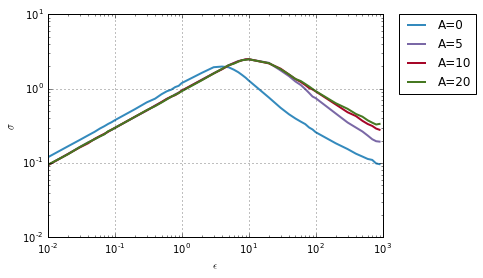

In [50]:
escapetime_std(-3,-9,0,5,10,20,ntraj=10000,yscale='log')

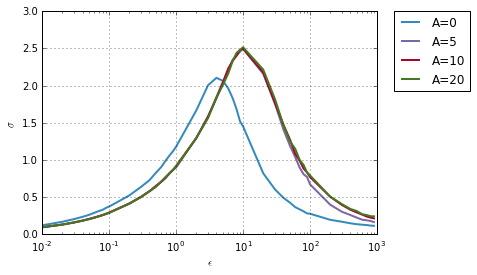

In [297]:
escapetime_std(-3,-9,0,5,10,20,ntraj=10000)

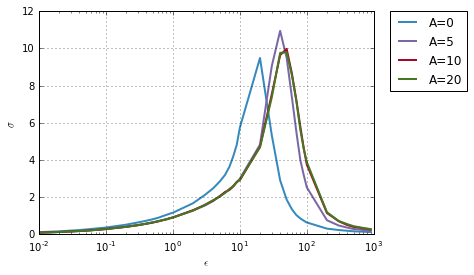

In [298]:
escapetime_std(-7,-49,0,5,10,20,ntraj=10000)

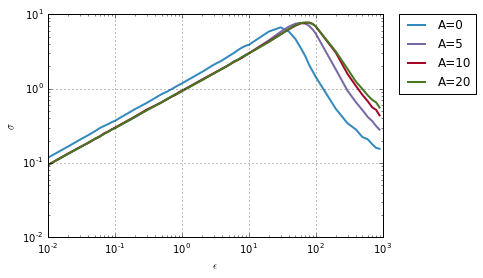

In [59]:
escapetime_std(-7,-49,0,5,10,20,ntraj=10000,yscale='log')

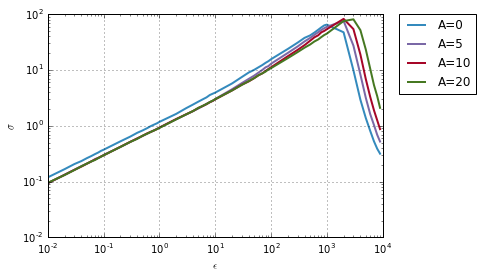

In [83]:
escapetime_std(-30,-900,0,5,10,20,ntraj=10000,yscale='log',eps_exp_range=range(-2,4))

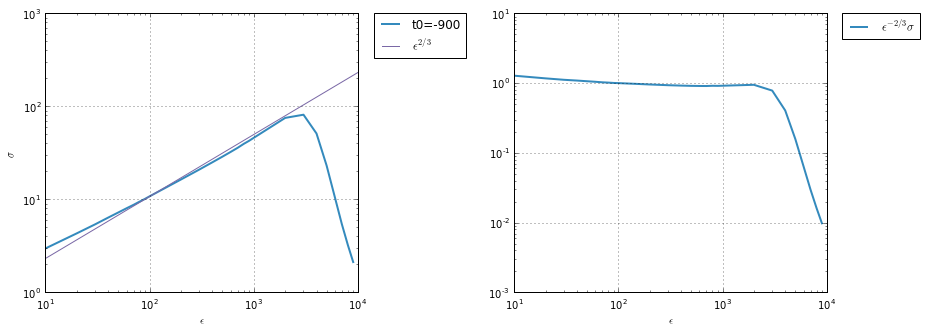

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$\epsilon$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid()
ax1.set_ylabel('$\sigma$')
t0, x0, A = (-900,-30, 20)
ax1.plot(epsvals,stdt,linewidth=2,label='t0='+str(t0))
ax1.plot(np.linspace(10,10000),0.5*np.linspace(10,10000)**(2./3),label='$\epsilon^{2/3}$')
#ax1.plot(np.linspace(10,10000),1.5*np.linspace(10,10000)**(3./4),label='$\epsilon^{3/4}$')
#ax1.plot(np.linspace(10,10000),0.7*np.linspace(10,10000)**(7./8),label='$\epsilon^{7/8}$')
#ax1.plot(np.linspace(10,10000),0.4*np.linspace(10,10000),label='$\epsilon$')
ax1.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
ax2.plot(epsvals,stdt/(0.5*epsvals**(2./3)),linewidth=2,label='$\epsilon^{-2/3}\sigma$')
#ax2.plot(epsvals,stdt/(0.7*epsvals[avgt < 0]**(7./8)),linewidth=2,label='$\epsilon^{-7/8}<t_\star>$')
#ax2.plot(epsvals,stdt/(1.5*epsvals[avgt < 0]**(3./4)),linewidth=2,label='$\epsilon^{-3/4}<t_\star>$')
ax2.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
fig.subplots_adjust(wspace=0.5)
plt.show()

### Pdf of the escape time

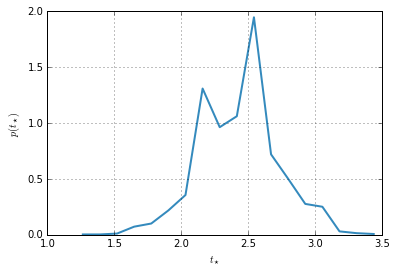

In [6]:
stoch_model_1.escapetime_pdf_plot(-3,-9,10,ntraj=20000)

In [4]:
def escapetime_pdf_cvg(x0,t0,A,model,**kwargs):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    for ax in (ax1,ax2):
        ax.set_xlabel('$t_\star$')
        ax.set_ylabel('$p(t_\star)$')
        ax.grid()    
    ax2.set_yscale('log')
    maxtraj = kwargs.get('maxtraj',100000)
    mintraj = kwargs.get('mintraj',100)
    samples = model.escapetime_sample(x0,t0,A,ntraj=maxtraj,**kwargs)
    while maxtraj >= mintraj:
        hist, rc = np.histogram(samples[:maxtraj],bins='doane',density=True)
        rc = rc[:-1] + 0.5*(rc[1]-rc[0])
        pdf_line1, = ax1.plot(rc,hist,linewidth=2,label='$n_{iter}=$'+str(maxtraj))
        pdf_line2, = ax2.plot(rc,hist,linewidth=2,label='$n_{iter}=$'+str(maxtraj))
        maxtraj /= 10
        if kwargs.get('show_avg',False):
            ax1.axvline(x=np.mean(samples[:maxtraj]),linewidth=1,color=pdf_line1.get_color())
            ax2.axvline(x=np.mean(samples[:maxtraj]),linewidth=1,color=pdf_line2.get_color())
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    fig.subplots_adjust(wspace=0.5)
    plt.show()

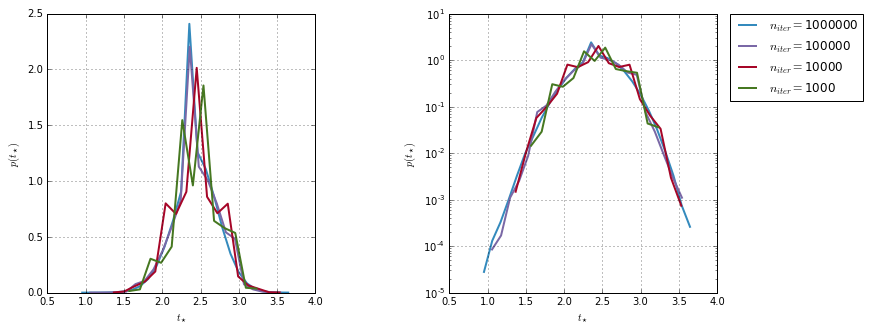

In [89]:
escapetime_pdf_cvg(-3,-9,10,stoch_model_1,maxtraj=1000000,mintraj=1000)

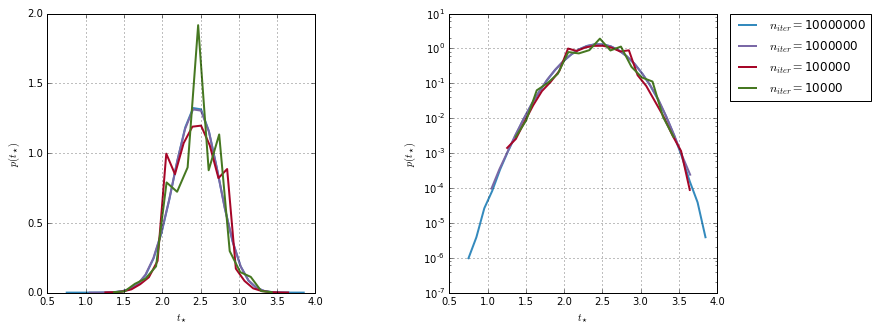

In [5]:
escapetime_pdf_cvg(-3,-9,10,stoch_model_1,maxtraj=10000000,mintraj=10000)

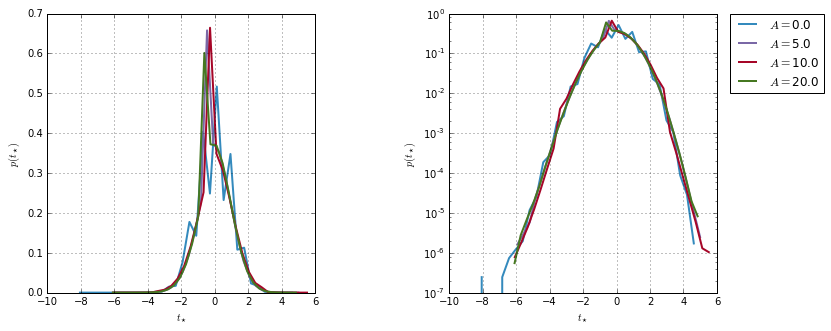

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$t_\star$')
    ax.set_ylabel('$p(t_\star)$')
    ax.grid()    
ax2.set_yscale('log')
for A in [0.,5.0,10.0,20.0]:
    pdf = stoch_model_1.escapetime_pdf(-3.0,-9.0,A,ntraj=10000000,standardize=True)
    pdf_line1, = ax1.plot(*pdf,linewidth=2,label='$A=$'+str(A))
    pdf_line2, = ax2.plot(*pdf,linewidth=2,label='$A=$'+str(A))
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
fig.subplots_adjust(wspace=0.5)
plt.show()

In [71]:
def escapetime_pdf_plot(x0,t0,A,*args,**kwargs):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    var = '(t_\star-<t_\star>)/\sigma' if kwargs.get('standardize',False) else 't_\star'
    for ax in (ax1,ax2):
        ax.set_xlabel('$'+var+'$')
        ax.set_ylabel('$p('+var+')$')
        ax.grid()    
    ax2.set_yscale('log')
    for model in args:
        pdf = model.escapetime_pdf(x0,t0,A,**kwargs)
        pdf_line1, = ax1.plot(*pdf,linewidth=2,label='$\epsilon=$'+str(model.D0))
        pdf_line2, = ax2.plot(*pdf,linewidth=2,label='$\epsilon=$'+str(model.D0))
    if kwargs.get('fit',False):
        for ax in (ax1,ax2):
            xx = np.linspace(*ax.get_xlim())
            ax.plot(xx,np.exp(-xx**2/2)/np.sqrt(2*np.pi),color='black')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    fig.subplots_adjust(wspace=0.5)
    plt.show()

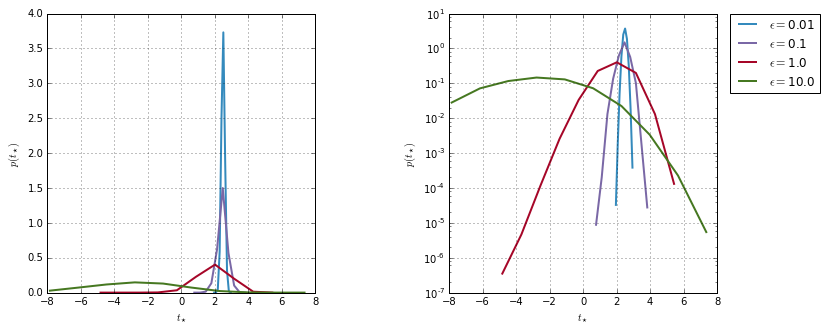

In [36]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,bins=10)

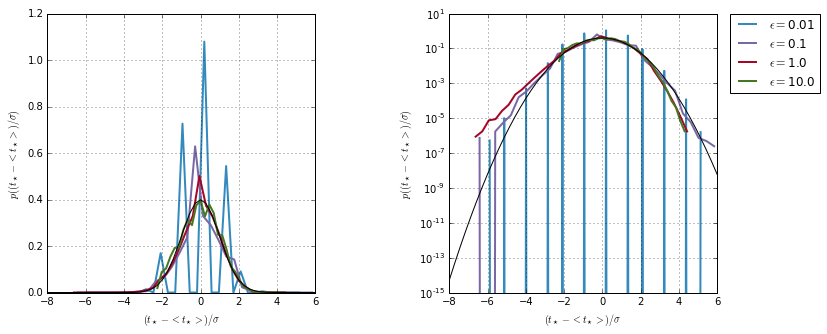

In [16]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,standardize=True,fit=True)

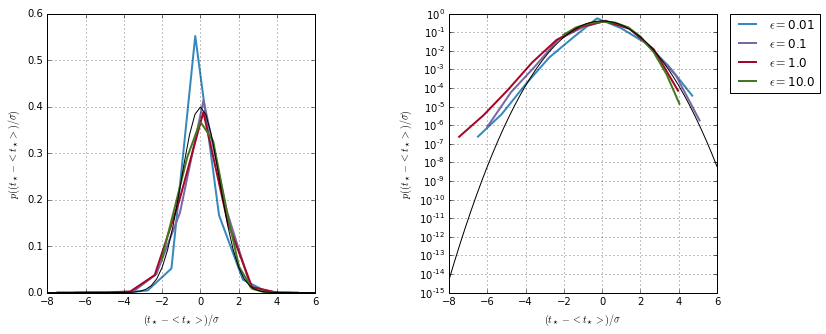

In [35]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,standardize=True,fit=True,bins=10)

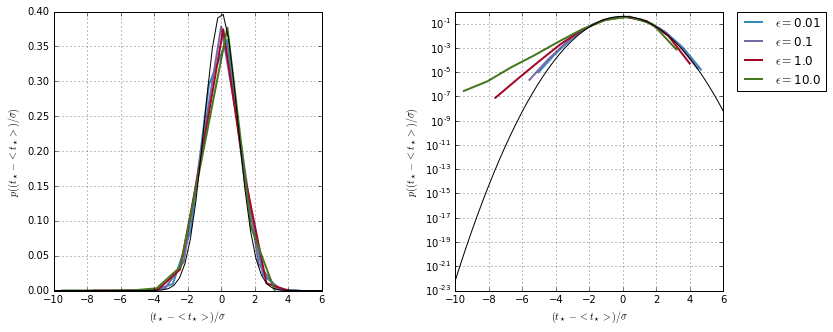

In [72]:
escapetime_pdf_plot(-7,-49,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,standardize=True,fit=True,bins=10)